In [1]:
import numpy as np

#Transition matrix
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

# Initial state probabilities
initial_prob = np.array([1.0, 0.0, 0.0])  # Start in state 0
steps = 10

# Track probabilities over time
probabilities_over_time = [initial_prob]

# Compute probabilities at each step
for _ in range(steps):
    next_prob = np.dot(probabilities_over_time[-1], P)  # Update probabilities
    probabilities_over_time.append(next_prob)

# Convert list to a numpy array for easier analysis
probabilities_over_time = np.array(probabilities_over_time)

# Print results
for step, probs in enumerate(probabilities_over_time):
    print(f"Step {step}: {probs}")


Step 0: [1. 0. 0.]
Step 1: [0.7 0.2 0.1]
Step 2: [0.57 0.27 0.16]
Step 3: [0.512 0.297 0.191]
Step 4: [0.4857 0.3082 0.2061]
Step 5: [0.47367 0.31307 0.21326]
Step 6: [0.468142 0.315247 0.216611]
Step 7: [0.4655957 0.3162352 0.2181691]
Step 8: [0.46442137 0.31668747 0.21889116]
Step 9: [0.46387943 0.31689536 0.21922521]
Step 10: [0.46362925 0.31699113 0.21937962]


In [2]:
from comp import comp
from markovChain import markovChain
from sensor import sensor

Easy Test 1: Markov Chain Object

y0: -13.075266666666666, y1: 3.5806


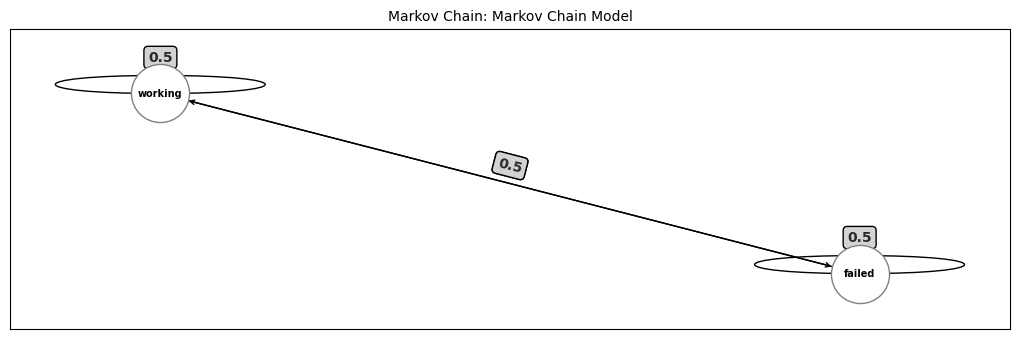

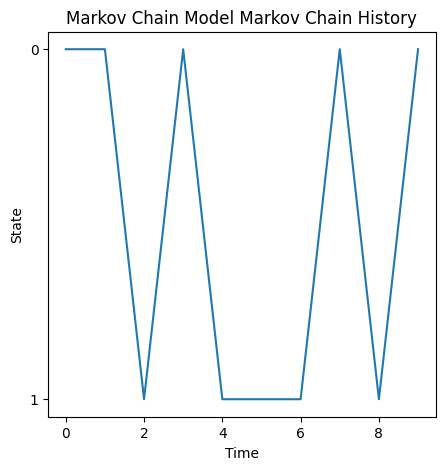

In [3]:
def simulateChain(time_steps = 10):
    
    # initialize a test Markov Chain
    mC = markovChain()
    mC.updateState(time_steps)
    mC.draw()
        
simulateChain()

Easy Test 2: Sensor Object

y0: -13.075266666666666, y1: 3.5806


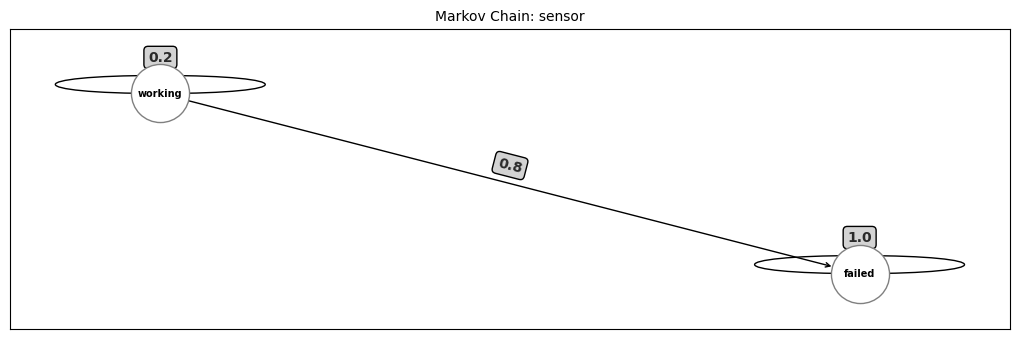

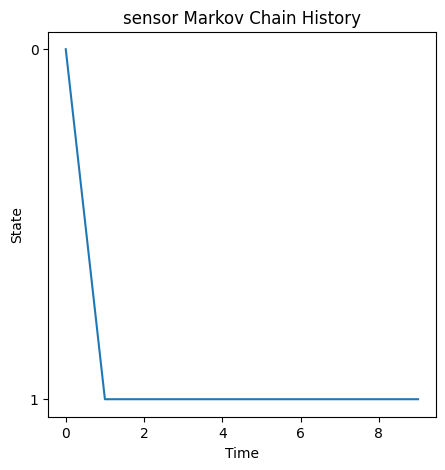

In [4]:
def simulateSensor(time_steps = 10):
    
    # initialize a test sensor
    s1 = sensor(0.2)
    s1.updateState(time_steps)
    s1.markov_model.draw()

simulateSensor()

[1. 0. 0.]
[0.98 0.01 0.01]
[0.9604 0.0196 0.02  ]
[0.941192 0.028812 0.029996]
[0.92236816 0.03764768 0.03998416]
[0.9039208  0.04611841 0.0499608 ]
[0.88584238 0.05423525 0.05992237]
[0.86812553 0.06200897 0.0698655 ]
[0.85076302 0.06945004 0.07978693]
[0.83374776 0.07656867 0.08968357]
[0.81707281 0.08337478 0.09955242]
[0.80073135 0.08987801 0.10939064]
[0.78471672 0.09608776 0.11919551]
[0.76902239 0.10201317 0.12896444]
[0.75364194 0.10766313 0.13869492]
[0.7385691  0.11304629 0.14838461]
[0.72379772 0.11817106 0.15803122]
[0.70932177 0.12304561 0.16763262]
[0.69513533 0.12767792 0.17718675]
[0.68123262 0.13207571 0.18669166]
[0.66760797 0.13624652 0.1961455 ]
y0: -13.075266666666666, y1: 3.5806


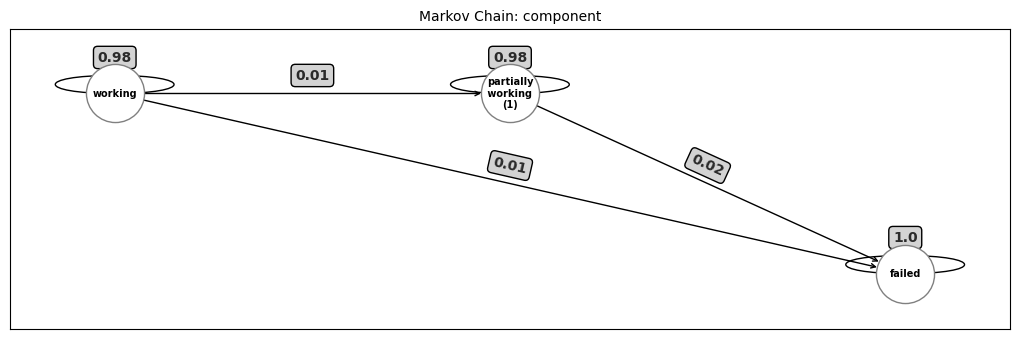

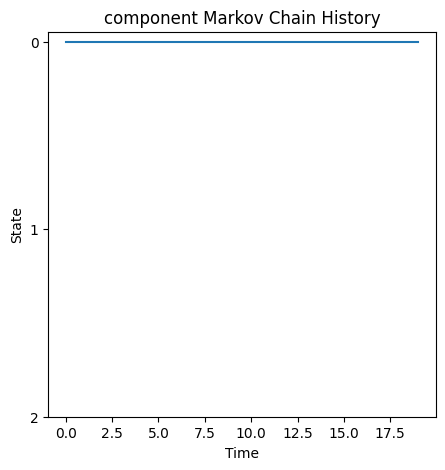

In [13]:
def simulateComp(time_steps = 20):
    
    # initialize a test Markov Chain
    c1 = comp()
    print(c1.state_prob)
    for i in range(time_steps):
        c1.updateState(1)
        print(c1.state_prob)

    c1.markov_model.draw()
        
simulateComp()

In [6]:
from sensedComp import sensedComp

def simulateSensedComp(time_steps = 10):
    
    # initialize a test sensed component
    sc1 = sensedComp()
    sc1.updateState(time_steps)
    sc1.markov_model.draw()

simulateSensedComp()

the sensor state is:  1
the sensor state probability is:  1
the component state is:  0
the component state probability is:  [1. 0. 0.]


AttributeError: 'sensedComp' object has no attribute 'transition_matrix'